# SPLIT SENTENCE

In [6]:
import csv, pandas

In [23]:
# maxwell = pandas.read_csv('tokenizedsenakhir_CNN label.csv', usecols=["Review_bersih"])
# dt_tweet = maxwell["Review_Bersih"].tolist()

In [2]:
import re
#mengubah (kata.ini) menjadi (kata. ini)
def corr(s):
    return re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', s))

def normalize_slang_word(str):
    text_list = str.split(' ')
    slang_words_raw = pandas.read_csv('slang_word_list.csv', sep=',', header=None)
    slang_word_dict = {}
    
    for item in slang_words_raw.values:
        slang_word_dict[item[0]] = item[1]
        
        for index in range(len(text_list)):
            if text_list[index] in slang_word_dict.keys():
                text_list[index] = slang_word_dict[text_list[index]]
    
    return ' '.join(text_list) 
i = 0
sent = []
while i < len(dt_tweet):
    x = dt_tweet[i].replace("..", ".")
    x = x.replace(",,", ",")
    x = x.replace(".", ". ")
    x = x.replace("Rp.", "rp. ")
    x = normalize_slang_word(x)
    sent.append(x)
    i += 1

In [3]:
i = 0
sent_ = []
while i < len(sent):
    x = corr(sent[i])
    sent_.append(x)
    i += 1

In [4]:
#Memecah ulasan menjadi kalimat-kalimat
import nltk
tokensen = []
# text = ["saya sekarang di Klaten. Mungkin besok di Jogja.", "Apa kamu bilang, saya tidak suka."]
for i in sent_:
    sent_text = nltk.sent_tokenize(i)
    tokensen.append(sent_text)

In [5]:
flat_list = []
for sublist in tokensen:
    for item in sublist:
        flat_list.append(item)

In [6]:
nestlist = []
for val in flat_list:
    val = [val]
    nestlist.append(val)

In [25]:
# HATIHATI NANTI REWRITE
#writerow is for column, writerows is for rows
import csv
header = ['Review_norm']
with open('.csv', 'w',  encoding="utf-8", newline='') as fp:
    a = csv.writer(fp,delimiter=',')
    a.writerow(header)
    for val in nestlist:
        a.writerow(val)

# CLEAN

In [3]:
maxwell1 = pandas.read_csv('Train-3 SEN_NEG.csv', usecols=["Review_bersih_joined"])
maxwell1.head()

,Review_bersih_joined
0,pengunjung candi borobodur cukup banyak padat
1,setelah membeli tiket yang cukup panjang antri...
2,pada dasarnya saya bukan tipe orang yang suka ...
3,melihat kemegahan borobudurketika dilokasi jan...
4,jika anda tertarik dalamnya tawar menawar harg...


In [5]:
len(maxwell1)

1000

In [6]:
review = maxwell1.values.tolist()

In [33]:
review

[['main kesini karena salah satu warisan budaya indonesia'],
 ['candi salah satu yang terbesar diindonesia'],
 ['saya tinggal yogya juga'],
 ['pengalaman berharga bisa kesini dengan teman teman alumni'],
 ['datang hujan begitu masuk langsung sewa andhong buat mengantar gerbang candi'],
 ['begitu turun langsung sewa payung'],
 ['seru'],
 ['walau hujan tetap berkeringat sampai puncak stupa'],
 ['pulangnya nonton animasi raka petualangan samudera'],
 ['keren'],
 ['saya terakhir kali mengunjungi borobudur pada saat saya'],
 ['baru sekarang mendapat kesempatan untuk mengunjungi borobudur kembali'],
 ['kami mengunjungi candi borobudur pada siang sore hari bulan desember'],
 ['pengunjung candi borobodur cukup banyak padat'],
 ['banyak rombongan mahasiswa atau pelajar'],
 ['setelah membeli tiket yang cukup panjang antrinya kami masuk area candi'],
 ['untuk menuju candi borobodur kita bisa memakai kereta kereta kuda mobil golf dimana kita harus membeli tiket kendaraannya loket dalam area candi'

In [7]:
# def join_negation(text):
#     """  Join negation word with delimiter. """
#     text_list = text.split(' ')

#     for index in range(len(text_list)):
#         if (text_list[index] == 'tidak' or text_list[index] == 'kurang'):
#             if index < len(text_list) - 1:
#                 text_list[index] = text_list[index] + "_" + text_list[index + 1]
#                 text_list[index + 1] = ''
#             else:
#                 text_list[index] = ''

#     return ' '.join(text_list)

In [68]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

def casefolding(s):
    new_str = s.lower()  
    return new_str

def Neg_Handling(hasil):
    for val in hasil:
        j = 0
        check = False
        it = False
        cetak = ""
        while j < (len(val)-1):
            if val[j][1] == 'NEG':
                k = j+2
                cetak = cetak + val[j][0] + " "
                if (val[j+1][1] == 'JJ'):
                    if(k < len(val)-1):
                        if (val[j+2][1] == 'NN'):
                            tmp = "NEG_" + val[j+1][0] + " NEG_" + val[j+2][0]
                            check = True
                            it = True
                            cetak = cetak + tmp + " "
                if val[j+1][1] == 'VB':
                    if(k < len(val)-1):
                        if val[j+2][1] == 'NN':
                            tmp = "NEG_" + val[j+1][0] + " NEG_" + val[j+2][0]
                            check = True
                            it = True
                            cetak = cetak + tmp + " "
                if val[j+1][1] == 'RB':
                    if(k < len(val)-1):
                        if val[j+2][1] == 'VB' :
                            tmp = "NEG_" + val[j+1][0] + " NEG_" + val[j+2][0]
                            it = True
                            check = True
                            cetak = cetak + tmp + " "
                if val[j+1][1] == 'RB': 
                    if(k < len(val)-1):
                        if val[j+2][1] == 'JJ':
                            tmp = "NEG_" + val[j+1][0] + " NEG_" + val[j+2][0]
                            it = True
                            cetak = cetak + tmp + " "
                if val[j+1][1] == 'JJ' and check == False:
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if val[j+1][1] == 'VB' and check == False:
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if val[j+1][1] == 'NN':
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if val[j+1][1] == 'CD':
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if val[j+1][1] == 'RB':
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if val[j+1][1] == 'MD':
                    tmp = "NEG_" + val[j+1][0]
                    cetak = cetak + tmp + " "
                if it == True:
                    j = j + 3
                elif it == False:
                    j = j + 2
            else : 
                cetak = cetak + val[j][0] + " "
                j = j + 1
                if(j == (len(val)-1) and val[j][0] != None):
                    cetak = cetak + val[j][0]
        return cetak

def remove_punctuation(text):
    """ Remove all punctuation in text. """
    return re.sub(r'[^\s\w]', ' ', text)

def normalize_slang_word(str):
    text_list = str.split(' ')
    slang_words_raw = pandas.read_csv('slang_word_list.csv', sep=',', header=None)
    slang_word_dict = {}
    
    for item in slang_words_raw.values:
        slang_word_dict[item[0]] = item[1]
        
        for index in range(len(text_list)):
            if text_list[index] in slang_word_dict.keys():
                text_list[index] = slang_word_dict[text_list[index]]
    
    return ' '.join(text_list) 

def remove_repeated_character(str):
    str = re.sub(r'(.)\1{2,}', r'\1', str)
    
    return str

def remove_digit_number(text):
    """ Remove all digit number in text. """
    return re.sub(r'[^a-z ]*([.0-9])*\d', '', text)

def remove_unused_character(text):
    """ Remove characters that are less than two character. """
    text_list = text.split(' ')
    text_list_temp = []

    for index in range(len(text_list)):
        if len(text_list[index]) > 3:
            text_list_temp.append(text_list[index])

    return ' '.join(text_list_temp)

def remove_extra_space(text):
        """ Make extra space into one space. """
        text_list = text.split(' ')
        text_list_temp = []

        for word in text_list:
            if word.strip():
                text_list_temp.append(word.strip())

        return ' '.join(text_list_temp)

import re

In [7]:
flat_list = [item for sublist in review for item in sublist]

In [63]:
len(flat_list)

1000

In [71]:
resl = []
for m in flat_list:
    t = m.split()
    hasil = ct.tag_sents([t])
    tmp = Neg_Handling(hasil)
    resl.append(tmp)
#     x = casefolding(maxwell1['Review_Bersih'][i])
#     x = remove_repeated_character(x)
#     x = remove_punctuation(x)
#     x = remove_digit_number(x)
#     x = remove_unused_character(x)
#     x = remove_extra_space(x)
#     x = normalize_slang_word(normalize_slang_word(x))
#     x = join_negation(x)
#     x = remove_extra_space(x)
#     stp.append(x)
#     i += 1

In [72]:
resl

['pengunjung candi borobodur cukup banyak padat',
 'setelah membeli tiket yang cukup panjang antrinya kami masuk area candi',
 'pada dasarnya saya bukan NEG_tipe orang yang suka berkemah malas naik gunung malas kotoran',
 'melihat kemegahan borobudurketika dilokasi jangan kaget karena akan penuh sesak banyak orang berselfie bagi kita yang lebih suka menikmati kemegahan bangunan mungkin akan sedikit terkalahkan oleh orang selfie yang seakan seakan menguasai tempat',
 'jika anda tertarik dalamnya tawar menawar harga yang ditawarkan awalnya dapat sangat tinggi',
 'banyak tangga untuk memanjat',
 'pastikan anda membawa banyak topi kacamata hitam sebagai panas dapat benar benar kuat',
 'jangan NEG_lupa NEG_bekali diri dengan kacamata hitam masker atau syal untuk menutupi hidung mulut dari vulkanik yang sangat tebal',
 'sisi tebingnya batuan cukup tajam jadi jangan lupa pegangan tangan untuk yang sudah nikah',
 'memang terdapat kekurangan pada banyaknya pedagang yang menawarkan barang dengan

In [8]:
#HAPUS KATA TAPI TETAPI WALAUPUN
import re
jj = flat_list
kk = [val.split() for val in jj]
nah = []
for v in kk:
    baru = ""
    co = 0 
    for val in v:
        if(val == "tapi" and co != 0):
            break
        elif (val == "tetapi" and co != 0):
            break
        elif (val == "walaupun" and co != 0):
            break
        elif (val == "meskipun" and co != 0):
            break
        elif (val == "padahal" and co != 0):
            break
        elif (val == "namun" and co != 0):
            break
        else:
            baru = baru + val + " "
        co = co + 1
    baru = baru + " "
    baru = re.sub('  ', '', baru)
    nah.append(baru)

In [70]:
my_string = flat_list
negat = ["tidak", "kurang", "bukan", "jangan", "belum"]
sen = []
for val in my_string:
    cetak = ""
    res = ""
    for neg in negat:
        for vall in val.split():
            if vall == neg:
                cetak = neg + " " + val.split(neg, maxsplit=1)[-1]\
                     .split(maxsplit=1)[0]
                res = val.split(neg, maxsplit=1)[-1]\
                     .split(maxsplit=1)[0]
                hit = val.split().index(res)
            if vall == res and hit != (len(val.split())-1):
                cetak = cetak + " " + val.split(res, maxsplit=1)[-1]\
                     .split(maxsplit=1)[0]
                res = ""
                break
    sen.append(cetak)
    print(cetak)
sen





























tidak ada salahnya





tidak terasa panasnya









tidak diragukan lagi















tidak diperlukan kami
tidak begitu spektakuler
tidak layak dengan
tidak pernah bosan
















jangan lupa membawa





tidak pernah bosan
















tidak boleh dilewatkan
bukan yogyakarta





tidak terasa
jangan lupa untuk

tidak afdol kalau

tidak terhitung berapa



tidak menyurutkan niatku
tidak kenal borobudur




tidak putus hari




tidak lagi menyandang
















jangan sampai tidak

tidak dapat saya


jangan pergi saat
tidak setia tradisional

jangan kaget karena


tidak rugi kemari
tidak disiram rutin

tidak kelihatan gersang













tidak menggunakan highheels







tidak bosan saya




tidak hanya ingin








tidak ada lagi



tidak ada yang
tidak pada saat




bukan hanya menawarkan









tidak perlu kuatir


jangan lupa menanyakan
tidak berkunjung borobudur




tidak pernah bosan


tidak sia datang




tidak terik sehingga

b

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tidak ada salahnya',
 '',
 '',
 '',
 '',
 '',
 'tidak terasa panasnya',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tidak diragukan lagi',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tidak diperlukan kami',
 'tidak begitu spektakuler',
 'tidak layak dengan',
 'tidak pernah bosan',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'jangan lupa membawa',
 '',
 '',
 '',
 '',
 '',
 'tidak pernah bosan',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tidak boleh dilewatkan',
 'bukan yogyakarta',
 '',
 '',
 '',
 '',
 '',
 'tidak terasa',
 'jangan lupa untuk',
 '',
 'tidak afdol kalau',
 '',
 'tidak terhitung berapa',
 '',
 '',
 '',
 'tidak menyurutkan niatku',
 'tidak kenal borobudur',
 '',
 '',
 '',
 '',
 'tidak putus hari',
 '',
 '',
 '',
 '',
 'tida

In [9]:
cleaned = []
len(nah)

1000

In [19]:
for val in hsl:
    v = [val]
    cleaned.append(v)

In [10]:
# # HATIHATI NANTI REWRITE
# #writerow is for column, writerows is for rows
import pandas as pd
df = pd.read_csv("Train-3 SEN_NEG.csv")
df['Review_Bersih_Tapi_joined'] = nah
df.to_csv('Train-3 SEN_NEG.csv')

In [67]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
# flat_list
kal = flat_list
spl = [val.split() for val in kal]
hasil = [ct.tag_sents([val]) for val in spl]
hasil = [item for sublist in hasil for item in sublist]
sentimen = []
for val in hasil:
    tmp = ""
    for vall in val:
        if(vall[1] == "JJ" or vall[1] == "VB"):
            tmp = tmp + vall[0] + " "
    tmp = tmp.split()
    tmp = ' '.join(tmp)
    sentimen.append(tmp)

In [68]:
sentimen

['salah',
 'salah terbesar',
 'tinggal',
 'kesini',
 'datang masuk andhong buat',
 'turun payung',
 'seru',
 'berkeringat',
 'nonton samudera',
 '',
 'mengunjungi',
 'baru mendapat mengunjungi kembali',
 'mengunjungi',
 'pengunjung',
 'pelajar',
 'membeli panjang masuk',
 'menuju memakai membeli',
 'memilih menaiki merupakan tepat menikmati sambil naik responsif',
 'menyarankan bagus mengambil mengambil',
 'jadi berhenti mengambil candi',
 'candi disarankan memakai curam padat',
 'jawa terdapat bagus menjadi candi terdapat',
 'menikmati mengunjungi borobudur',
 'adalah terbesar',
 'lokal datang',
 'menikmati menurutmu baik tenggelam',
 'datang kamu menginap membutuhkan',
 'menghubungi transport borobudur',
 'menikmati sambil berjalan mengikui ada mengucap',
 'tersusun indah cantik mengandung nasehat luhur',
 'dewasa',
 'candi senang',
 'mulai masuk berjalan',
 'berjalan tampak',
 'terasa terik',
 'menikmati tahu tahu',
 'olah kelihatan',
 'memutuskan menuju keluar mushola',
 'ucapku',


In [ ]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
kal = "anda"
kal = kal.split()
hasil = ct.tag_sents([kal])
print(hasil)

In [18]:
kal = ["saya merasa tidak_sempurna badan", "gimana jika nggak", "iya saya kurang_setuju", "iya kan"]
# gg = kal.split()

def tidak(str):
    tmp = ""
    for v in str:
        if v == "_":
            tmp = str
            return tmp
        else :
            tmp = ""
    return tmp
    
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
# flat_list
# kal = d["Review_Stop_Stem_Neg"]
spl = [val.split() for val in kal]
hasil = [ct.tag_sents([val]) for val in spl]
hasil = [item for sublist in hasil for item in sublist]
aspek = []
for val in hasil:
    tmp = ""
    for vall in val:
        if(vall[1] == "RB" or vall[1] == "NEG" or vall[1] == "MD" or vall[1] == "JJ" or vall[1] == "VB"):
            tmp = tmp + vall[0] + " "
        tmp = tmp + tidak(vall[1]) + " "
    tmp = tmp.split()
    tmp = ' '.join(tmp)
    aspek.append(tmp)

In [19]:
aspek

['merasa', 'nggak', 'kurang_setuju', '']

# WORD DISTRIBUTION

In [3]:
senti = pandas.read_csv('Train-3 SEN_NEG.csv', usecols=["Review_Bersih_TAPI", "ganti"])
kal_positif = senti.loc[senti['ganti'] == "positif"]
kal_negatif = senti.loc[senti['ganti'] == "negatif"]

In [4]:
kal_positif = kal_positif.Review_Bersih_TAPI.values
kal_negatif = kal_negatif.Review_Bersih_TAPI.values

In [8]:
pos = pandas.read_csv('daftar_JJ.csv', usecols=["JJ", "poin"])
positif = pos.loc[pos['poin'] == 1]
negatif = pos.loc[pos['poin'] == -1]

In [11]:
positif = positif.JJ.values
negatif = negatif.JJ.values

In [14]:
# HITUNG POSITIF di Positif
hit = [val.split() for val in kal_positif]
count = []
for v in positif:
    co = 0
    for val in hit:
        for vall in val:
            if vall == v:
                co = co + 1
    count.append(co)

In [15]:
# HITUNG Positif di Negatif
hit1 = [val.split() for val in kal_negatif]
count1 = []
for v in positif:
    co = 0
    for val in hit1:
        for vall in val:
            if vall == v:
                co = co + 1
    count1.append(co)

In [24]:
sumcount = [x + y for x, y in zip(count, count1)]

In [25]:
averpos = [((x / y)*100) for x, y in zip(count, sumcount)]
averneg = [((x / y)*100) for x, y in zip(count1, sumcount)]

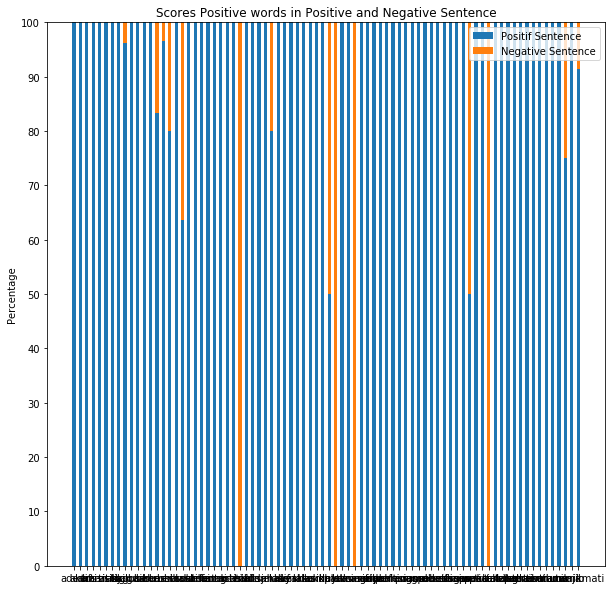

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

N = len(positif)

positiftuple = tuple(averpos)
negatiftuple = tuple(averneg)
ind = np.arange(N)    # the x locations for the groups
width = 0.5   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, positiftuple, width)
p2 = plt.bar(ind, negatiftuple, width,
             bottom=positiftuple)

plt.ylabel('Percentage')
plt.title('Scores Positive words in Positive and Negative Sentence')
plt.xticks(ind, (positif))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Positif Sentence', 'Negative Sentence'))

plt.show()

In [35]:
# HITUNG Negatif di Negatif
hit3 = [val.split() for val in kal_negatif]
count3 = []
for v in negatif:
    co = 0
    for val in hit3:
        for vall in val:
            if vall == v:
                co = co + 1
    count3.append(co)

In [36]:
# HITUNG Negatif di Positif
hit4 = [val.split() for val in kal_positif]
count4 = []
for v in negatif:
    co = 0
    for val in hit4:
        for vall in val:
            if vall == v:
                co = co + 1
    count4.append(co)

In [40]:
sumcount2 = [x + y for x, y in zip(count3, count4)]

In [41]:
averneg1 = [((x / y)*100) for x, y in zip(count3, sumcount2)]
averpos1 = [((x / y)*100) for x, y in zip(count4, sumcount2)]

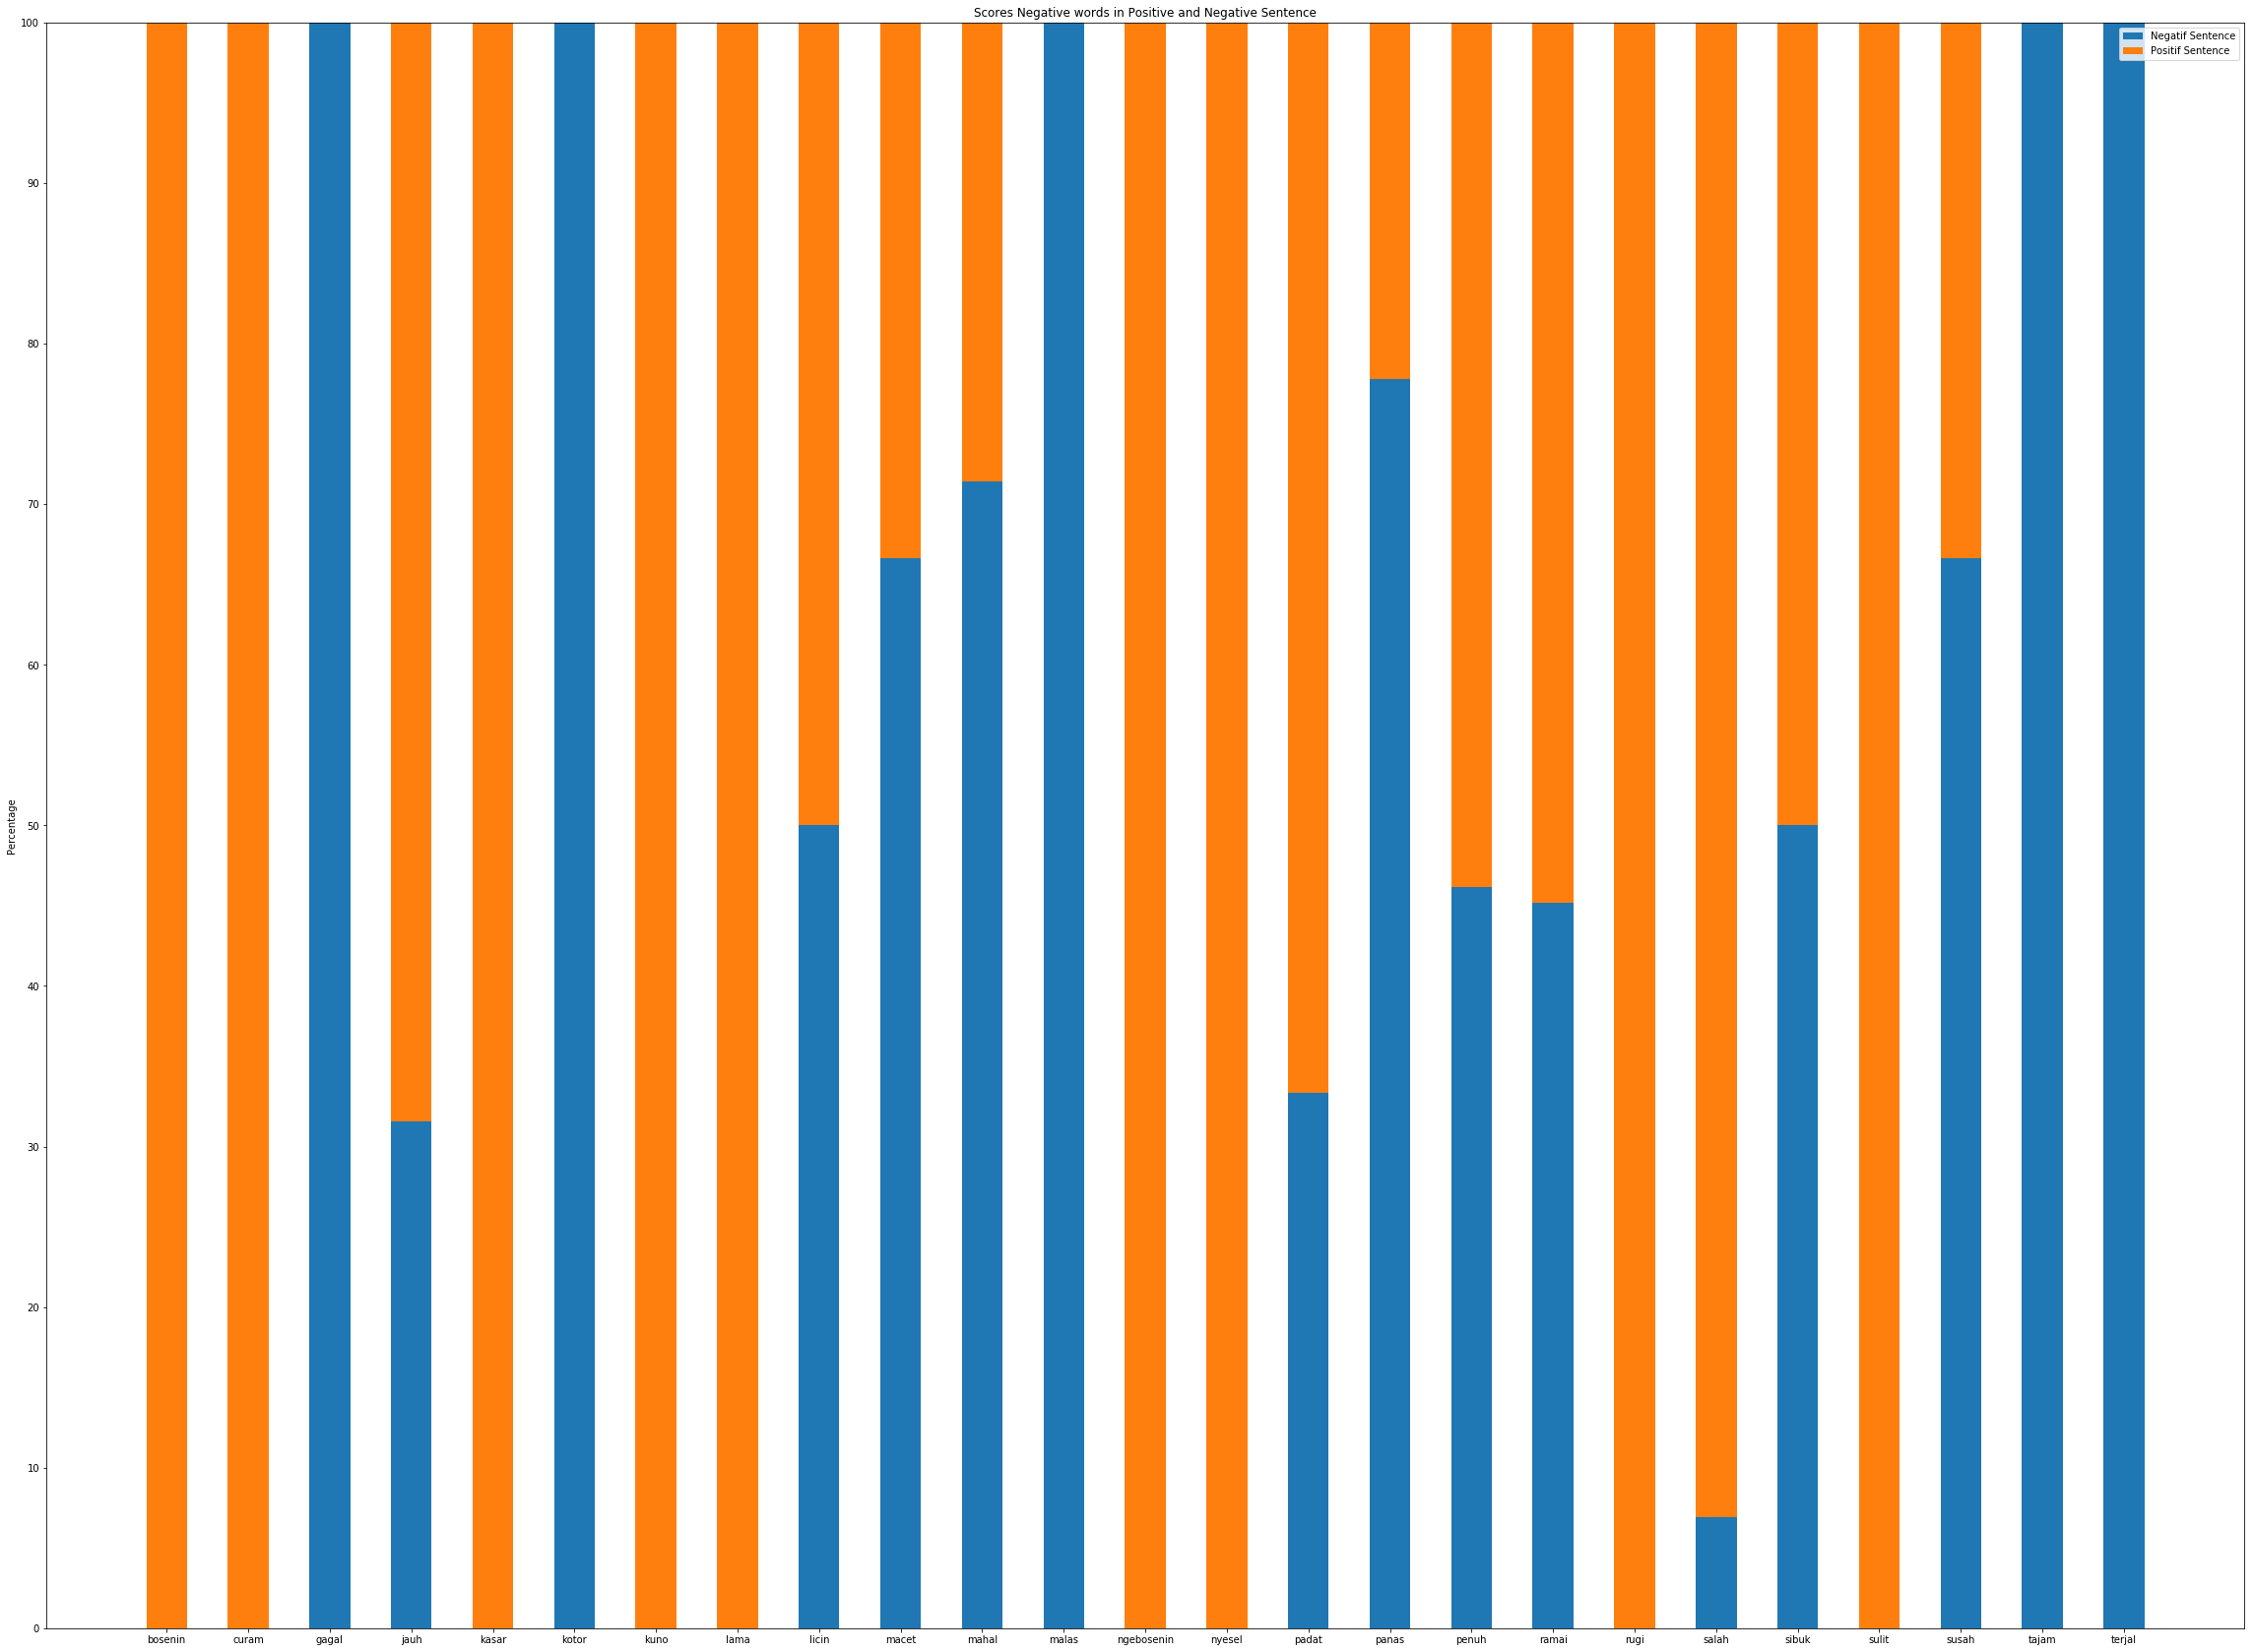

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40,30))

N = len(negatif)

negatiftuple1 = tuple(averneg1)
positiftuple1 = tuple(averpos1)
ind = np.arange(N)    # the x locations for the groups
width = 0.5   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, negatiftuple1, width)
p2 = plt.bar(ind, positiftuple1, width,
             bottom=negatiftuple1)

plt.ylabel('Percentage')
plt.title('Scores Negative words in Positive and Negative Sentence')
plt.xticks(ind, (negatif))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Negatif Sentence', 'Positif Sentence'))

plt.show()

# NEGATION DISTRIBUTION

In [43]:
data = pandas.read_csv('Train-3 SEN_NEG.csv', usecols=["ekstrak", "ganti"])

In [44]:
data=data[data['ekstrak'].notnull()]
data.reset_index(drop=True,inplace=True)

In [45]:
datapos = data.loc[data['ganti'] == "positif"]
dataneg = data.loc[data['ganti'] == "negatif"]

In [46]:
datapos = datapos.ekstrak.values
dataneg = dataneg.ekstrak.values

In [47]:
datapos = datapos.tolist()
dataneg = dataneg.tolist()

In [35]:
# datapos

In [51]:
# dataposs = []
# for val in datapos:
#     tmp = val.split(' ', 1)[1]
#     dataposs.append(tmp)

In [52]:
# datanegg = []
# for val in dataneg:
#     tmp = val.split(' ', 1)[1]
#     datanegg.append(tmp)

In [54]:
df = pandas.DataFrame({'a':datapos})
poscount = df['a'].value_counts()

In [55]:
df = pandas.DataFrame({'b':dataneg})
negcount = df['b'].value_counts()

In [61]:
# dd = {'POS':poscount, 'NEG':negcount} 
  
# # Create DataFrame 
# dfd = pandas.DataFrame(dd) 
# # Print the output. 
# dfd

In [62]:
# dfd.plot.barh(stacked=True);

# STOPWORD DISTRIBUTION

In [6]:
maxwell1 = pandas.read_csv('Train-3 SEN_NEG.csv', usecols=["Review Bersih"])

In [15]:
review = maxwell1.values.tolist()
flat_list = [item for sublist in review for item in sublist]

In [20]:
kamus_kata = []
for x in flat_list:
    tmp = x.split()
    for v in tmp:
        kamus_kata.append(v)
kamus_kata = list(set(kamus_kata))

In [21]:
len(kamus_kata)

2048

In [23]:
spl = [val.split() for val in flat_list]
distrib = []
for v in kamus_kata:
    co = 0
    for val in spl:
        for vall in val:
            if vall == v:
                co = co + 1
    distrib.append(co)

In [33]:
import pandas as pd 
  
# intialise data of lists. 
data = {'Word Distribution':kamus_kata, 'Count':distrib} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df = df.sort_values(by=['Count'], ascending=False)

In [60]:
# print(df.to_string())

In [47]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
#LIST STOPWORD 
stopword = [pernah, begitu, dan, untuk, yang, dengan, sangat, banyak, dari, kita, saya, juga, bisa, 
            karena, kalau, tapi, akan, sudah, kami, saat, adalah, anda, lagi, buat, salah, sampai, 
            dapat, dalam, lebih, pada, sekali, atau, masih, jika, apa, beberapa, menjadi, tetap, saja, 
            terdapat, boleh, begitu, hanya, paling, sehingga, jadi, sambil, harus, memang, setiap, 
            selalu, berada, kamu, sebagai, bagi, sana, lain, setelah, semua, 
            seperti, dulu, dahulu, ketika,, terlalu, mungkin, namun, hingga, ada, bila, agak,  tersebut, 
            sebuah, selain, sungguh, bahkan, tetapi, apalagi, belum, telah, terus, meskipun, lalu, 
            sama, agar, pula, secara, selama, tiap, bagian, meski, yaitu,  serta, seorang, orang, 
            walaupun, tertentu, maka, seolah, cuma, sang, alhamdulillah, seakan, bakal, sekaligus, 
            kebanyakan, sebelum, senantiasa, adanya, jadinya, itulah, tadi, terkait, begitulah, kira, 
            ke, di, nya, antara, ialah]
# Kalimat
kalimat = 'banyak sekali makanan'
stop = stopword.remove(kalimat)
print(stop)

banyak sekali makanan


# Tidak POS-TAG

In [80]:
maxwell1 = pandas.read_csv('Train-3 SEN_NEG.csv', usecols=["ekstrak", "ganti"])

In [83]:
data=maxwell1[maxwell1['ekstrak'].notnull()]
data.reset_index(drop=True,inplace=True)
review = data.ekstrak.values.tolist()
flat_list = [item for sublist in review for item in sublist]

In [74]:
kal = flat_list
I = []
for val in kal:
    tmp = val.split()
    hasil = ct.tag_sents([tmp])
    cetak = ""
    for v in hasil:
        for vv in v:
            cetak = cetak + " " + str(vv[1])
        I.append(cetak)

In [76]:
# intialise data of lists. 
data = {'Negasi':flat_list, 'TAG':I} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df = df.sort_values(by=['TAG'], ascending=False)

In [79]:
len(df)

147

In [34]:
# print(df.to_string())

# Split Tapi-Meskipun-Walaupun

In [104]:
maxwell1 = pandas.read_csv('tokenizedsenakhir_CNN label.csv',  usecols=["Review_bersih"])

In [109]:
review = maxwell1['Review_bersih'].values.tolist()
# sent = maxwell1['ganti'].values.tolist()
# asp = maxwell1['Aspek_Kategori'].values.tolist()

In [1]:
review = ['terdapat banyak penjual yang menyediakan souvenir tetapi penjualnya sangat memaksa sehingga mengganggu']

In [2]:
my_string = review
def Split_Con(list):
    revbar = []
    for val in list:
        for kal in val.split():
            if (kal == "tapi" or kal == "tetapi" or kal == "walaupun" or kal == "meskipun" or kal == "padahal"
               or kal == "namun"):
                if kal == "tapi":
                    tmp = val.split("tapi")
                elif kal == "tetapi":
                    tmp = val.split("tetapi")
                elif kal == "walaupun":
                    tmp = val.split("walaupun")
                elif kal == "meskipun":
                    tmp = val.split("meskipun")
                elif kal == "padahal":
                    tmp = val.split("padahal")
                elif kal == "namun":
                    tmp = val.split("namun")
                break
            else : 
                tmp = [val]
        for vv in tmp:
            vv = ' '. join(vv.split())
            revbar.append(vv)
    return revbar

In [3]:
Split_Con(review)

['terdapat banyak penjual yang menyediakan souvenir',
 'penjualnya sangat memaksa sehingga mengganggu']

In [114]:
len(revbar)

49963

In [115]:
import csv
header = ['Review_Bersih']
with open('49000_DATA_NEWEST.csv', 'w',  encoding="utf-8", newline='') as fp:
    a = csv.writer(fp,delimiter=',')
    a.writerow(header)
    for val in revbar:
        a.writerow([val])

# Stemming

In [116]:
maxwell1 = pandas.read_csv('49000_DATA_NEWEST.csv', usecols=["Review_Bersih"])

In [117]:
review = maxwell1['Review_Bersih'].values.tolist()
len(review)

48403

In [19]:
review = ['meskipun begitu makanan sangat enak untuk dinikmati kita semua']

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def Stemming(list):
    resl = []
    for val in list:
        katadasar = stemmer.stem(val)
        resl.append(katadasar)
    return resl

In [21]:
Stemming(review)

['meski begitu makan sangat enak untuk nikmat kita semua']

In [120]:
# df = pd.read_csv("49000_DATA_NEWEST.csv")
# df['Review_Stemming'] = resl
# df.to_csv('49000_DATA_NEWEST.csv')

# Stopwords

In [121]:
maxwell1 = pandas.read_csv('49000_DATA_NEWEST.csv', usecols=["Review_Bersih"])

In [122]:
review = maxwell1['Review_Bersih'].values.tolist()
len(review)

48403

In [11]:
stopwords = ["pernah", "dan", "untuk", "yang", "dengan", "sangat", "banyak", "dari", 
            "kita", "saya", "juga", "bisa", "karena", "kalau", "tapi", "akan", "sudah", "kami", "adalah", 
            "anda", "lagi", "buat", "salah", "sampai", "dapat", "dalam", "lebih", "pada", "sekali", "atau", "masih", 
            "jika", "apa", "beberapa", "menjadi", "tetap", "saja", "terdapat", "boleh", "begitu", "hanya", "paling", 
            "sehingga", "jadi", "sambil", "harus", "memang", "setiap", "selalu", "berada", "kamu", "sebagai", "bagi", 
            "sana", "lain", "setelah", "semua", "seperti", "dulu", "dahulu", "ketika", "terlalu", "mungkin", "namun", 
            "hingga", "ada", "bila", "agak",  "tersebut", "sebuah", "selain", "sungguh", "bahkan", "tetapi", "apalagi", 
            "belum", "telah", "terus", "meskipun", "lalu", "sama", "agar", "pula", "secara", "selama", "tiap", "bagian", 
            "meski", "yaitu",  "serta", "seorang", "orang", "walaupun", "tertentu", "maka", "seolah", "cuma", "sang", 
            "alhamdulillah", "seakan", "bakal", "sekaligus", "kebanyakan", "sebelum", "senantiasa", "adanya", "saat",
            "itulah", "tadi", "terkait", "begitulah", "kira", "ke", "di", "nya", "antara", "ialah", "ya",
            "ini", "itu"]

def stopword(list):
    rsl = []
    for val in list:
        querywords = val.split()
        resultwords  = [word for word in querywords if word.lower() not in stopwords]
        result = ' '.join(resultwords)
        rsl.append(result)
    return rsl

In [12]:
stopword(review)

['']

In [125]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST.csv")
df['Review_Stopwords'] = rsl
df.to_csv('49000_DATA_NEWEST.csv')

# Stopword-Stemming

In [126]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

resl = []
kalimat = rsl
for val in kalimat:
    katadasar = stemmer.stem(val)
    resl.append(katadasar)

In [127]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST.csv")
df['Review_Stem_Stop'] = resl
df.to_csv('49000_DATA_NEWEST.csv')

# JOINED

In [141]:
#Stop
import pandas
maxwell1 = pandas.read_csv('49000_DATA_NEWEST.csv', usecols=["Review_Stemming"])
review = maxwell1['Review_Stemming'].values.tolist()

In [24]:
def join_negation(text):
    """  Join negation word with delimiter. """
    text_list = text.split(' ')

    for index in range(len(text_list)):
        if (text_list[index] == 'tidak' or text_list[index] == 'kurang' or text_list[index] == 'jangan'
           or text_list[index] == 'bukan'):
            if index < len(text_list) - 1:
                text_list[index] = text_list[index] + "_" + text_list[index + 1]
                text_list[index + 1] = ''
            else:
                text_list[index] = ''
    return ' '.join(' '.join(text_list).split())

join_negation(halo)

'ini saya tidak_suka dengan makanan ini'

In [23]:
halo = "ini saya tidak suka dengan makanan ini"
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# def stem(list):
#     tmp = []
#     for val in list:
#         katadasar = stemmer.stem(val)
#         tmp.append(katadasar)
#     return tmp


In [22]:
b = [1,2,3]
c = [2,5,6]

for val, valb in zip(b,c):
    print(str(val) + " " + str(valb))

1 2
2 5
3 6


In [143]:
jwb = []
for val in review:
    tmp = join_negation(val)
    jwb.append(tmp)

In [144]:
len(jwb)

48272

In [145]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST.csv")
df['Review_Stemming_Joined'] = jwb
df.to_csv('49000_DATA_NEWEST.csv')

# NEGATION

In [156]:
maxwell1 = pandas.read_csv('49000_DATA_NEWEST.csv', usecols=["Review_Stop_Stem"])
review = maxwell1['Review_Stop_Stem'].values.tolist()

In [157]:
kk = ["jangan lupa beli makanan", "tidak suka makanan ini", "yang ini bukan", "ini kurang apa"]
def Neg_Handling(text):
    """  Join negation word with delimiter. """
    text_list = text.split(' ')

    for index in range(len(text_list)):
        if (text_list[index] == 'tidak' or text_list[index] == 'kurang' or text_list[index] == 'jangan'
           or text_list[index] == 'bukan'):
            if index < len(text_list) - 1:
                text_list[index] = text_list[index] + " NEG_" + text_list[index + 1]
                text_list[index + 1] = ''
            else:
                text_list[index] = text_list[index]
    return ' '.join(' '.join(text_list).split())

In [158]:
tmbh = []
for val in review:
    tmp = Neg_Handling(val)
    tmbh.append(tmp)

In [159]:
len(tmbh)

48272

In [160]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST.csv")
df['Review_Stop_Stem_Neg'] = tmbh
df.to_csv('49000_DATA_NEWEST.csv')

# Cek Negasi

In [25]:
import pandas
maxwell1 = pandas.read_csv('Training_DATA_NEWEST.csv', usecols=["Review_Stopwords"])
review = maxwell1['Review_Stopwords'].values.tolist()

In [26]:
len(review)

1048

In [27]:
your_string = review
negation = ["bukan", "tidak", "jangan", "kurang"]

def check(sentence, list):
    tmp = sentence.split()
    for word in tmp:
        if word in list:
            return word
            break
re = []
for val in your_string:
    list_of_words = val.split()
    cek = check(val, negation)
    if cek is not None:
        if list_of_words.index(cek) != len(list_of_words)-1:
            next_word = cek + " " + list_of_words[list_of_words.index(cek) + 1]
            re.append(next_word)
        else :
            re.append("")
    else:
        re.append("")

In [28]:
import pandas as pd
df = pd.read_csv("Training_DATA_NEWEST.csv")
df['Review_ekstrak'] = re
df.to_csv('Training_DATA_NEWEST.csv')

# JIKA, APABILA, KALAU, BILA

In [1]:
import pandas
maxwell1 = pandas.read_csv('49000_DATA_NEWEST_.csv', usecols=["Review_Bersih"])
review = maxwell1['Review_Bersih'].values.tolist()

In [2]:
# kk = ["apakah ada jika anda suka", "aku biasa aja", "gimana suka", "yakalau gitu bagaimana kalau"]
andai = ["jika", "apabila", "kalau", "bila"]

def check(sentence, list):
    tmp = sentence.split()
    for word in tmp:
        tmpx = ""
        if word in list:
            tmpx = word
            break
        else:
            tmpx = ""
    return tmpx

In [3]:
hsl = []
for val in review :
    tmp = check(val, andai)
    hsl.append(tmp)

In [5]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST_.csv")
df['jika'] = hsl
df.to_csv('49000_DATA_NEWEST_.csv')

# Sayang/dilewatkan

In [12]:
import pandas
maxwell1 = pandas.read_csv('49000_DATA_NEWEST_.csv', usecols=["Review_Bersih"])
review = maxwell1['Review_Bersih'].values.tolist()

In [13]:
kk = ["apakah ada sayang anda suka", "aku biasa aja", "gimana sayang suka", "yakalau gitu bagaimana kalau"]
andai = ["lahar", "cuaca", "minuman"]

def check(sentence, list):
    tmp = sentence.split()
    for word in tmp:
        tmpx = ""
        if word in list:
            tmpx = word
            break
        else:
            tmpx = ""
    return tmpx

In [14]:
hsl = []
for val in review :
    tmp = check(val, andai)
    hsl.append(tmp)

In [15]:
len(hsl)

42969

In [16]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST_.csv")
df['cuaca'] = hsl
df.to_csv('49000_DATA_NEWEST_.csv')

# Count Length

In [9]:
import pandas
maxwell1 = pandas.read_csv('49000_DATA_NEWEST_.csv', usecols=["Review_Bersih"])
review = maxwell1['Review_Bersih'].values.tolist()

In [10]:
kk = review
hit = []
for val in kk:
    count = 0
    for vall in val.split():
        count += 1
    hit.append(count)

In [11]:
len(hit)

43863

In [12]:
import pandas as pd
df = pd.read_csv("49000_DATA_NEWEST_.csv")
df['count'] = hit
df.to_csv('49000_DATA_NEWEST_.csv')

C:\Users\ROYAN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
